# AoA-AR-Taper Surrogate 

## Lift

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd

#from scipy.interpolate import RBFInterpolator
from scipy.interpolate import Rbf
import linear_regression as lr
import surrogate as sr
import pickle


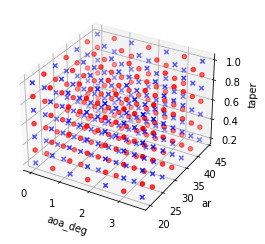

In [2]:
filename = 'aoa_ar_taper_forces_v1.csv'
cwd = os.getcwd()

output_name = 'lift'
parameter_names = ['aoa_deg','ar','taper']
file_path = cwd+'/surrogate_data/'+filename
surrogate_type = 'polynomial'
degree = {'aoa_deg':2,
         'ar':3,
         'taper':4}

surr_dict = {
    'output_name': output_name,
    'parameter_names': parameter_names,
    'file_path': file_path,
    'surrogate_type': surrogate_type,
    'degree': degree
}
lift_surr = sr.Surrogate(surr_dict)
data_pandas = lift_surr.get_data()
num_models = lift_surr.num_models
i_train = np.arange(0,num_models+1,2)
i_test = np.arange(1,num_models,2)

lift_surr.sort_data(i_train,i_test)
lift_surr.plot_doe()
lift_surr.build()

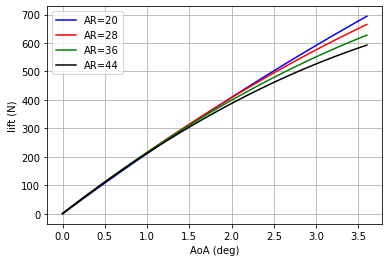

In [6]:
ar_values = np.linspace(20,44,7)
taper_values = np.linspace(0.2,1.0,7)
aoa_deg_values = np.linspace(0,3.6,7)
xp = np.linspace(0,3.6,100)
yp0 = ar_values[0]*np.ones(xp.shape)
yp1 = ar_values[1]*np.ones(xp.shape)
yp2 = ar_values[2]*np.ones(xp.shape)
yp3 = ar_values[3]*np.ones(xp.shape)
yp4 = ar_values[4]*np.ones(xp.shape)
yp5 = ar_values[5]*np.ones(xp.shape)
yp6 = ar_values[6]*np.ones(xp.shape)

zp0 = taper_values[0]*np.ones(xp.shape)
zp1 = taper_values[1]*np.ones(xp.shape)
zp2 = taper_values[2]*np.ones(xp.shape)
zp3 = taper_values[3]*np.ones(xp.shape)
zp4 = taper_values[4]*np.ones(xp.shape)
zp5 = taper_values[5]*np.ones(xp.shape)
zp6 = taper_values[6]*np.ones(xp.shape)

xp0 = {'aoa_deg':xp,'ar':yp0,'taper':zp6}
xp1 = {'aoa_deg':xp,'ar':yp1,'taper':zp6}
xp2 = {'aoa_deg':xp,'ar':yp2,'taper':zp6}
xp3 = {'aoa_deg':xp,'ar':yp3,'taper':zp6}
xp4 = {'aoa_deg':xp,'ar':yp4,'taper':zp6}
xp5 = {'aoa_deg':xp,'ar':yp5,'taper':zp6}
xp6 = {'aoa_deg':xp,'ar':yp6,'taper':zp6}

fig, ax = plt.subplots()

ax.plot(xp,lift_surr.surr.eval_surrogate(xp0),'b-')
ax.plot(xp,lift_surr.surr.eval_surrogate(xp2),'r-')
ax.plot(xp,lift_surr.surr.eval_surrogate(xp4),'g-')
ax.plot(xp,lift_surr.surr.eval_surrogate(xp6),'k-')
ax.legend(['AR=20','AR=28','AR=36','AR=44'])
ax.grid(True)
ax.set_ylabel('lift (N)')
ax.set_xlabel('AoA (deg)')

plt.show()


## Drag

In [9]:
output_name = 'drag'
parameter_names = ['aoa_deg','ar','taper']
file_path = cwd+'/surrogate_data/'+filename
surrogate_type = 'polynomial'
degree = {'aoa_deg':3,
         'ar':3,
         'taper':4}

surr_dict = {
    'output_name': output_name,
    'parameter_names': parameter_names,
    'file_path': file_path,
    'surrogate_type': surrogate_type,
    'degree':degree
}
drag_surr = sr.Surrogate(surr_dict)
data_pandas = drag_surr.get_data()
num_models = drag_surr.num_models
i_train = np.arange(0,num_models+1,2)
i_train = np.arange(1,num_models,2)

drag_surr.sort_data(i_train,i_test)
drag_surr.build()

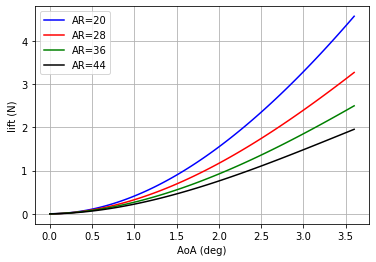

In [10]:
fig, ax = plt.subplots()

ax.plot(xp,drag_surr.surr.eval_surrogate(xp0),'b-')
ax.plot(xp,drag_surr.surr.eval_surrogate(xp2),'r-')
ax.plot(xp,drag_surr.surr.eval_surrogate(xp4),'g-')
ax.plot(xp,drag_surr.surr.eval_surrogate(xp6),'k-')
ax.legend(['AR=20','AR=28','AR=36','AR=44'])
ax.grid(True)
ax.set_ylabel('Drag (N)')
ax.set_xlabel('AoA (deg)')

plt.show()

In [12]:
# Save the surrogates
save_lift_filepath = cwd+'/surrogate_built/'+'lift_aoa_ar_taper_surr_v1.csv'
save_drag_filepath = cwd+'/surrogate_built/'+'drag_aoa_ar_taper_surr_v1.csv'
lift_surr.surr.save_parameters(save_lift_filepath)
drag_surr.surr.save_parameters(save_drag_filepath)


array(['x^0*y^0*z^0', 'x^0*y^0*z^1', 'x^0*y^0*z^2', 'x^0*y^0*z^3',
       'x^0*y^0*z^4', 'x^0*y^1*z^0', 'x^0*y^1*z^1', 'x^0*y^1*z^2',
       'x^0*y^1*z^3', 'x^0*y^1*z^4', 'x^0*y^2*z^0', 'x^0*y^2*z^1',
       'x^0*y^2*z^2', 'x^0*y^2*z^3', 'x^0*y^2*z^4', 'x^0*y^3*z^0',
       'x^0*y^3*z^1', 'x^0*y^3*z^2', 'x^0*y^3*z^3', 'x^0*y^3*z^4',
       'x^1*y^0*z^0', 'x^1*y^0*z^1', 'x^1*y^0*z^2', 'x^1*y^0*z^3',
       'x^1*y^0*z^4', 'x^1*y^1*z^0', 'x^1*y^1*z^1', 'x^1*y^1*z^2',
       'x^1*y^1*z^3', 'x^1*y^1*z^4', 'x^1*y^2*z^0', 'x^1*y^2*z^1',
       'x^1*y^2*z^2', 'x^1*y^2*z^3', 'x^1*y^2*z^4', 'x^1*y^3*z^0',
       'x^1*y^3*z^1', 'x^1*y^3*z^2', 'x^1*y^3*z^3', 'x^1*y^3*z^4',
       'x^2*y^0*z^0', 'x^2*y^0*z^1', 'x^2*y^0*z^2', 'x^2*y^0*z^3',
       'x^2*y^0*z^4', 'x^2*y^1*z^0', 'x^2*y^1*z^1', 'x^2*y^1*z^2',
       'x^2*y^1*z^3', 'x^2*y^1*z^4', 'x^2*y^2*z^0', 'x^2*y^2*z^1',
       'x^2*y^2*z^2', 'x^2*y^2*z^3', 'x^2*y^2*z^4', 'x^2*y^3*z^0',
       'x^2*y^3*z^1', 'x^2*y^3*z^2', 'x^2*y^3*z^3', 'x^2*y^3*z

In [15]:
save_liftsurr_filepath = cwd+'/surrogate_built/'+'lift_aoa_ar_taper_surr_v1.pickle'
save_dragsurr_filepath = cwd+'/surrogate_built/'+'drag_aoa_ar_taper_surr_v1.pickle'
# open a file, where you ant to store the data
file = open(save_liftsurr_filepath, 'wb')
pickle.dump(lift_surr,file)
file.close()

In [16]:
# open a file, where you ant to store the data
file = open(save_dragsurr_filepath, 'wb')
pickle.dump(drag_surr,file)
file.close()